In [14]:
# Get MSTR price data and calculate 

import pandas as pd
import yfinance as yf

mstr_data = yf.download('MSTR', start='2015-09-20', end='2025-09-19')

mstr_data = mstr_data.reset_index().rename(columns={'index': 'Date'})

mstr_data['Daily Return'] = mstr_data['Close'].pct_change()

filepath = "mstr_daily_returns.csv"

mstr_data.to_csv(filepath, index=False) # Save without the DataFrame index

print(f"Data with daily returns saved to: {filepath}")
first5=mstr_data.head()
last5=mstr_data.tail()
print(first5)
print(last5)

C:\Users\yut3\AppData\Local\Temp\ipykernel_8756\4230127284.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  mstr_data = yf.download('MSTR', start='2015-09-20', end='2025-09-19')
[*********************100%***********************]  1 of 1 completed

Data with daily returns saved to: mstr_daily_returns.csv
Price        Date      Close       High        Low       Open   Volume  \
Ticker                  MSTR       MSTR       MSTR       MSTR     MSTR   
0      2015-09-21  20.850000  21.103001  20.638000  20.801001   936000   
1      2015-09-22  20.707001  20.841000  20.559999  20.691000   821000   
2      2015-09-23  20.827999  20.885000  20.659000  20.788000   624000   
3      2015-09-24  20.518999  20.910000  20.389999  20.698999  1297000   
4      2015-09-25  20.518999  21.458000  20.344999  20.731001  1251000   

Price  Daily Return  
Ticker               
0               NaN  
1         -0.006858  
2          0.005843  
3         -0.014836  
4          0.000000  
Price        Date       Close        High         Low        Open    Volume  \
Ticker                   MSTR        MSTR        MSTR        MSTR      MSTR   
2509   2025-09-12  331.440002  336.130005  327.600006  329.149994  10809900   
2510   2025-09-15  327.790009  33

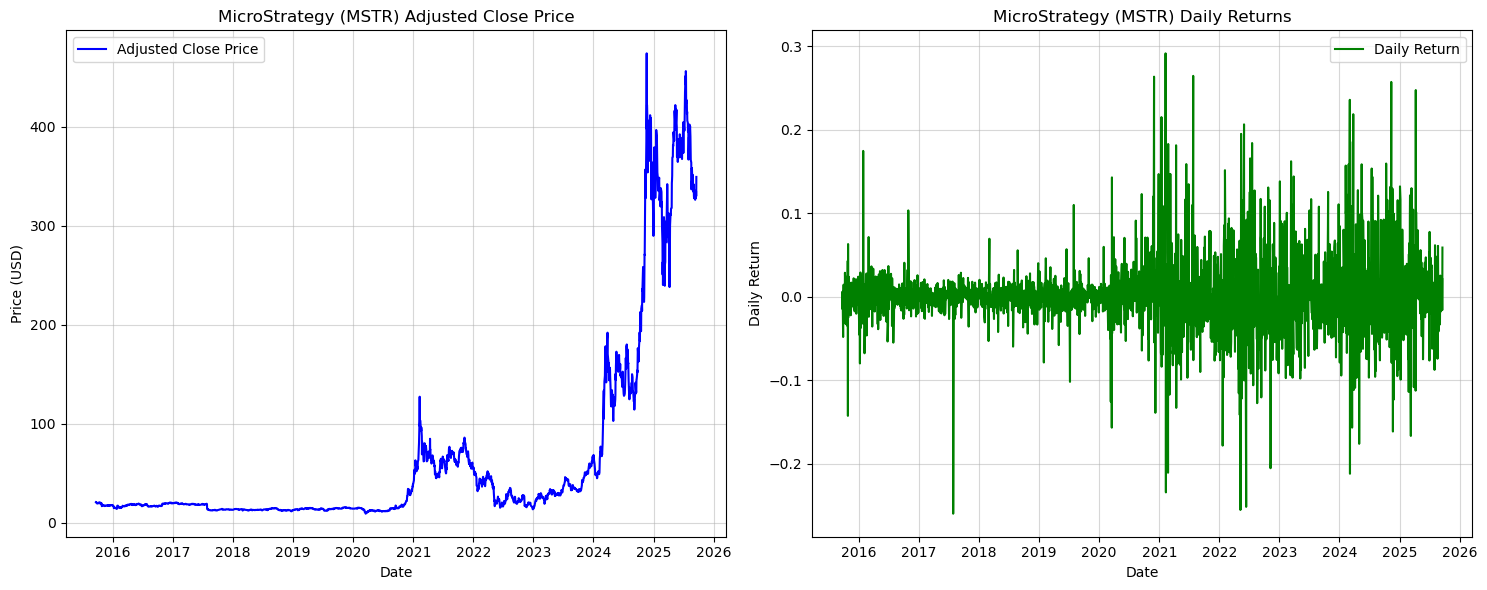

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved data
output_filepath = "mstr_daily_returns.csv"
mstr_data = pd.read_csv(output_filepath, parse_dates=['Date'])

# Ensure Date is the index
mstr_data.set_index('Date', inplace=True)

# Convert columns to numeric to avoid errors
mstr_data['Close'] = pd.to_numeric(mstr_data['Close'], errors='coerce')
mstr_data['Daily Return'] = pd.to_numeric(mstr_data['Daily Return'], errors='coerce')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

# Convert index to NumPy array before plotting
axes[0].plot(mstr_data.index.to_numpy(), mstr_data['Close'].to_numpy(), label='Adjusted Close Price', color='blue')
axes[0].set_title("MicroStrategy (MSTR) Adjusted Close Price")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Price (USD)")
axes[0].grid(alpha=0.5)
axes[0].legend()

axes[1].plot(mstr_data.index.to_numpy(), mstr_data['Daily Return'].to_numpy(), label='Daily Return', color='green')
axes[1].set_title("MicroStrategy (MSTR) Daily Returns")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Daily Return")
axes[1].grid(alpha=0.5)
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
import yfinance as yf

# Download historical data for MSTR
mstr_data = yf.download('MSTR', start='2015-09-20', end='2025-09-19')

# Calculate daily returns as percentage changes
mstr_data['Daily Return (%)'] = mstr_data['Close'].pct_change() * 100

# Initialize variables
initial_capital = 1000  # Starting with $1,000
current_capital = initial_capital
holding_position = False  # Track if we're holding a position
trade_log = []

# Simulate the strategy
for i in range(1, len(mstr_data)):
    if not holding_position:
        # Check if the prior day's drop was >= 5% (buy signal)
        if mstr_data['Daily Return (%)'].iloc[i - 1] <= -5:
            try:
                # Buy at the next day's opening price
                buy_date = mstr_data.index[i]
                buy_price = mstr_data['Open'].iloc[i]
                holding_position = True  # Set position to holding
            except KeyError:
                # Handle missing data gracefully
                continue

    if holding_position:
        # Calculate the target sell price (5% above the buy price)
        target_price = float(buy_price) * 1.04

        # Check if the closing price exceeds the target price
        if float(mstr_data['Close'].iloc[i]) >= target_price:
            # Sell at today's closing price
            sell_date = mstr_data.index[i]
            sell_price = float(mstr_data['Close'].iloc[i])

            # Calculate profit and update capital
            profit = (sell_price - float(buy_price)) / float(buy_price) * current_capital
            current_capital += profit

            # Log the trade details
            trade_log.append({
                'Buy Date': buy_date,
                'Buy Price': float(buy_price),
                'Sell Date': sell_date,
                'Sell Price': sell_price,
                'Profit (%)': (sell_price - float(buy_price)) / float(buy_price) * 100,
                'Portfolio Value': current_capital
            })

            # Exit the position
            holding_position = False

# Convert trade log to a DataFrame
trade_results = pd.DataFrame(trade_log)

# Save the trade results to a CSV file
output_filepath = "mstr_trading_strategy_results.csv"
trade_results.to_csv(output_filepath, index=False)

# Display the trade results
print("Trade results saved to:", output_filepath)
print(trade_results)

# Final portfolio value
print(f"\nStarting with ${initial_capital}, your portfolio value at the end is: ${current_capital:.2f}")

C:\Users\yut3\AppData\Local\Temp\ipykernel_8756\2120715917.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  mstr_data = yf.download('MSTR', start='2015-09-20', end='2025-09-19')
[*********************100%***********************]  1 of 1 completed
C:\Users\yut3\AppData\Local\Temp\ipykernel_8756\2120715917.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  target_price = float(buy_price) * 1.04
C:\Users\yut3\AppData\Local\Temp\ipykernel_8756\2120715917.py:35: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if float(mstr_data['Close'].iloc[i]) >= target_price:
C:\Users\yut3\AppData\Local\Temp\ipykernel_8756\2120715917.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) 

Trade results saved to: mstr_trading_strategy_results.csv
     Buy Date   Buy Price  Sell Date  Sell Price  Profit (%)  Portfolio Value
0  2015-10-28   16.825001 2015-10-28   17.885000    6.300145      1063.001451
1  2016-01-11   14.982000 2016-01-12   15.619000    4.251769      1108.197820
2  2016-02-08   15.453000 2016-02-29   16.089001    4.115710      1153.808026
3  2016-06-27   17.073000 2016-07-08   17.829000    4.428047      1204.899192
4  2016-08-01   17.431999 2016-10-28   19.146999    9.838230      1323.439944
5  2017-07-31   13.990000 2018-08-24   14.967000    6.983561      1415.863186
6  2019-01-31   12.594000 2019-02-05   13.215000    4.930922      1485.678293
7  2019-05-02   14.074000 2019-06-19   14.767000    4.923972      1558.832676
8  2019-07-09   12.594000 2019-07-31   13.673000    8.567576      1692.386846
9  2020-03-10   13.193000 2020-08-14   14.663000   11.142275      1880.957236
10 2020-09-18   16.552000 2020-10-21   18.105000    9.382549      2057.438968
11 202